![](https://www.soyhenry.com/_next/static/media/HenryLogo.bb57fd6f.svg)

# Introducción a las bases de datos vectoriales 
## Clase #4 :Rags Y bases de datos Vectoriales 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from openai import OpenAI
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_community.vectorstores import Chroma
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

/Users/carlosdaniel/Documents/Projects/labor_projects/Henry/2026/01-introduction_ai_engineering/ai_engineering_henry/02-vector_data_bases/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [3]:
movies_info = [
    {
        "title": "RoboCop",
        "content": (
            "RoboCop (1987), dirigida por Paul Verhoeven, es una película de ciencia ficción y acción ambientada en un Detroit "
            "futurista plagado de crimen y controlado por la megacorporación OCP (Omni Consumer Products). "
            "El oficial de policía Alex Murphy (Peter Weller) es brutalmente asesinado por la banda del criminal Clarence Boddicker "
            "(Kurtwood Smith) durante una patrulla. OCP recupera su cuerpo y lo transforma en RoboCop, un cíborg policía "
            "sobrehumano con armadura de titanio, fuerza extraordinaria y puntería perfecta. "
            "Aunque su memoria ha sido oficialmente borrada, Murphy comienza a experimentar fragmentos de recuerdos de su vida "
            "pasada: su esposa Ellen, su hijo Jimmy, y el trauma de su propia muerte. "
            "Mientras lucha contra el crimen callejero, RoboCop descubre una conspiración dentro de OCP liderada por el "
            "vicepresidente Dick Jones, quien está aliado con Boddicker. La película explora temas de identidad, humanidad vs "
            "tecnología, corrupción corporativa, privatización de servicios públicos y la lucha por recuperar la esencia humana "
            "en un mundo dominado por las máquinas y el capitalismo desmedido."
        )
    },
    {
        "title": "The Terminator",
        "content": (
            "The Terminator (1984), dirigida por James Cameron, es una película de ciencia ficción y acción. "
            "En el año 2029, la inteligencia artificial Skynet domina el mundo tras una guerra nuclear que casi extermina "
            "a la humanidad. Para asegurar su victoria, Skynet envía al pasado (1984) un cíborg asesino llamado T-800 "
            "(Arnold Schwarzenegger), un Terminator con apariencia humana pero esqueleto de metal y fuerza sobrehumana. "
            "Su misión es eliminar a Sarah Connor (Linda Hamilton), una joven camarera cuyo hijo aún no nacido, John Connor, "
            "se convertirá en el líder de la resistencia humana. "
            "Kyle Reese (Michael Biehn), un soldado de la resistencia, es enviado al mismo período para protegerla. "
            "La película es una persecución implacable por las calles de Los Ángeles donde Sarah pasa de ser una mujer "
            "ordinaria a una sobreviviente decidida. La película explora temas de destino vs libre albedrío, "
            "los peligros de la inteligencia artificial, paradojas temporales y la resistencia humana ante fuerzas "
            "aparentemente invencibles. Es la primera entrega de una de las franquicias más icónicas del cine de acción."
        )
    },
    {
        "title": "Interstellar",
        "content": (
            "Interstellar (2014), dirigida por Christopher Nolan, es una épica de ciencia ficción protagonizada por "
            "Matthew McConaughey como Cooper, un expiloto de la NASA y granjero. La Tierra se está muriendo: plagas "
            "destruyen los cultivos y tormentas de polvo asfixian a la humanidad. La NASA, operando en secreto, "
            "descubre un agujero de gusano cerca de Saturno que conecta con otra galaxia. "
            "Cooper es reclutado para liderar la misión Endurance junto a la Dra. Amelia Brand (Anne Hathaway), "
            "Romilly (David Gyasi) y Doyle (Wes Bentley). Visitan tres planetas candidatos: Miller (con olas gigantes "
            "donde 1 hora equivale a 7 años terrestres), Mann (un mundo helado donde el Dr. Mann, interpretado por "
            "Matt Damon, los traiciona) y Edmunds. "
            "La película está fundamentada en la física teórica del premio Nobel Kip Thorne y explora la dilatación "
            "temporal, los agujeros negros (el icónico Gargantúa), la quinta dimensión y la gravedad cuántica. "
            "El corazón emocional es la relación entre Cooper y su hija Murph (Jessica Chastain de adulta): "
            "el sacrificio de un padre que envejece más lento que sus hijos debido a la relatividad. "
            "Temas principales: amor trascendiendo el espacio-tiempo, sacrificio, supervivencia de la especie, "
            "y la tensión entre exploración y quedarse con quienes amamos."
        )
    },
    {
        "title": "El Número 23",
        "content": (
            "El Número 23 (2007), dirigida por Joel Schumacher, es un thriller psicológico protagonizado por Jim Carrey "
            "en un papel dramático inusual para él. Walter Sparrow (Carrey) es un empleado de control de animales que "
            "recibe de su esposa Agatha (Virginia Madsen) un misterioso libro titulado 'El Número 23'. "
            "A medida que lee la novela, Walter descubre paralelismos inquietantes entre la vida del protagonista ficticio, "
            "el detective Fingerling, y su propia biografía. Comienza a obsesionarse con el número 23, viéndolo en todas "
            "partes: fechas de nacimiento, direcciones, eventos históricos (cada dato suma 23). "
            "La obsesión lo consume hasta el punto de la paranoia y el insomnio. Su esposa y su hijo Robin intentan "
            "ayudarlo, pero Walter se hunde cada vez más. El giro final revela que Walter mismo escribió el libro años "
            "atrás, durante un episodio traumático que borró de su memoria: un crimen pasional que cometió y que su "
            "mente reprimió como mecanismo de defensa. El libro era su confesión inconsciente. "
            "Temas: obsesión numérica, memoria reprimida, culpa, la línea entre ficción y realidad, y cómo el pasado "
            "que intentamos olvidar siempre encuentra la manera de resurgir."
        )
    },
    {
        "title": "El discreto encanto de la burguesía",
        "content": (
            "El discreto encanto de la burguesía (1972), dirigida por Luis Buñuel, es una comedia surrealista francesa "
            "ganadora del Oscar a Mejor Película Extranjera. El reparto incluye a Fernando Rey, Delphine Seyrig, "
            "Stéphane Audran, Bulle Ogier y Jean-Pierre Cassel. "
            "La premisa es engañosamente simple: un grupo de amigos burgueses intenta repetidamente reunirse para cenar "
            "elegantemente, pero cada intento es frustrado por circunstancias cada vez más absurdas. "
            "Las interrupciones incluyen: llegar al restaurante el día equivocado, una redada militar que convierte "
            "la cena en un ejercicio de combate, descubrir que el dueño del restaurante acaba de morir, ser arrestados "
            "sin razón aparente, y un escenario teatral que los expone como actores sin guion. "
            "La estructura narrativa incluye múltiples capas de sueños dentro de sueños, donde los personajes despiertan "
            "de una pesadilla solo para descubrir que siguen soñando. Escenas recurrentes muestran al grupo caminando "
            "por una carretera vacía sin destino aparente, simbolizando su vacío existencial. "
            "Temas: sátira de la hipocresía burguesa, crítica al colonialismo, la superficialidad de las convenciones "
            "sociales, la naturaleza ilusoria de la realidad, y la futilidad de los rituales sociales de la clase alta."
        )
    },
    {
        "title": "Eterno resplandor de una mente sin recuerdos",
        "content": (
            "Eterno resplandor de una mente sin recuerdos (Eternal Sunshine of the Spotless Mind, 2004), dirigida por "
            "Michel Gondry con guion del aclamado Charlie Kaufman (ganador del Oscar por este guion). "
            "Protagonizada por Jim Carrey como Joel Barish, un hombre introvertido, y Kate Winslet como Clementine "
            "Kruczynski, una mujer impulsiva y de pelo colorido. Tras una dolorosa ruptura, Joel descubre que Clementine "
            "se ha sometido a un procedimiento experimental en la clínica del Dr. Howard Mierzwiak (Tom Wilkinson) "
            "para borrar selectivamente todos los recuerdos de su relación. "
            "Devastado, Joel decide hacerse el mismo procedimiento. La mayor parte de la película transcurre dentro "
            "de la mente de Joel durante el borrado: revivimos su relación en orden inverso, desde las peleas amargas "
            "hasta los momentos más dulces del enamoramiento. A medida que los recuerdos se desvanecen, Joel se da "
            "cuenta de que no quiere olvidarla e intenta esconder a Clementine en rincones ocultos de su memoria "
            "(recuerdos de infancia, humillaciones, memorias no relacionadas). "
            "El elenco secundario incluye a Kirsten Dunst, Mark Ruffalo y Elijah Wood, cada uno con su propia "
            "subtrama sobre la memoria y el arrepentimiento. "
            "Temas principales: la memoria como identidad, el dolor como parte esencial del amor, si borrar el "
            "sufrimiento vale la pena cuando también se pierde la alegría, el determinismo emocional (¿estamos "
            "condenados a repetir los mismos patrones?), y la belleza de los momentos imperfectos."
        )
    }
]

In [4]:
documents = [
    Document(page_content=m["content"], metadata={"title": m["title"]})
    for m in movies_info
]

In [5]:
print("Creando base de datos vectorial...")
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# Creamos la base de datos en memoria (Chroma)
vector_db = Chroma.from_documents(
    documents=documents,
    embedding=embeddings,
    collection_name="peliculas_collection"
)

Creando base de datos vectorial...


In [6]:
retriever = vector_db.as_retriever(search_kwargs={"k": 2}) # Traer solo las 2 más relevantes
llm = ChatOpenAI(model="gpt-4o", temperature=0)
template = """
Eres un experto en cine. Responde la pregunta basándote SOLAMENTE en el siguiente contexto recuperado.
Si la respuesta no está en el contexto, di que no lo sabes.

Para cada película relevante, menciona:
- El nombre de la película
- Cómo se relaciona específicamente con la pregunta
- Detalles concretos del contexto que lo demuestren (director, personajes, trama)

Contexto:
{context}

Pregunta: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [7]:
def format_docs(docs):
    return "\n\n".join([d.page_content for d in docs])

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [8]:
query = "¿En qué películas los protagonistas tienen problemas con su memoria o recuerdos?"

## Comparación: LLM sin RAG vs con RAG

Ahora vamos a hacer un experimento clave: **hacerle la misma pregunta al LLM de dos formas distintas**:

1. **Sin RAG (solo títulos):** Le damos al modelo únicamente los **nombres** de las películas de nuestra base de datos, sin descripciones. El modelo debe responder solo con su conocimiento general, que puede ser vago, incorrecto o incompleto sobre estas películas específicas.

2. **Con RAG (contexto recuperado):** El retriever busca los 2 documentos más relevantes en la base vectorial y se los pasa al modelo como contexto. El modelo responde con **detalles específicos** de las descripciones almacenadas.

Observa la diferencia: el RAG permite respuestas **más detalladas y fundamentadas** porque el modelo tiene acceso a la información concreta de nuestra base de datos.

In [9]:
# Respuesta SIN RAG: el LLM solo recibe los títulos, NO las descripciones
titulos = [m["title"] for m in movies_info]
lista_titulos = ", ".join(titulos)

response_sin_rag = client.chat.completions.create(
    model="gpt-4o",
    temperature=0,
    messages=[
        {"role": "system", "content": (
            "Eres un experto en cine. Responde la pregunta del usuario considerando "
            f"SOLAMENTE estas películas: {lista_titulos}. "
            "No tienes acceso a sinopsis ni descripciones, solo a los títulos."
        )},
        {"role": "user", "content": query}
    ]
)

print("Respuesta SIN RAG (solo títulos, sin descripciones):")
print("-" * 50)
respuesta_sin_rag = response_sin_rag.choices[0].message.content
print(respuesta_sin_rag)

Respuesta SIN RAG (solo títulos, sin descripciones):
--------------------------------------------------
En "Eterno resplandor de una mente sin recuerdos", los protagonistas tienen problemas con sus recuerdos, ya que la trama gira en torno a la eliminación de memorias específicas de una relación.


### Ahora con RAG: el modelo recibe contexto de la base de datos vectorial

In [10]:
respuesta_con_rag = rag_chain.invoke(query)
print("Respuesta CON RAG:")
print("-" * 50)
print(respuesta_con_rag)

# Mostrar los documentos recuperados
print("\n\nDocumentos recuperados por el retriever:")
print("=" * 50)
retrieved_docs = retriever.invoke(query)
for i, doc in enumerate(retrieved_docs):
    print(f"\n[Doc {i+1}] {doc.metadata['title']}:")
    print(f"  {doc.page_content[:150]}...")

Respuesta CON RAG:
--------------------------------------------------
Las películas en las que los protagonistas tienen problemas con su memoria o recuerdos son:

- **Eterno resplandor de una mente sin recuerdos (Eternal Sunshine of the Spotless Mind, 2004)**: En esta película, Joel Barish, interpretado por Jim Carrey, se somete a un procedimiento para borrar selectivamente todos los recuerdos de su relación con Clementine Kruczynski. La mayor parte de la película transcurre dentro de la mente de Joel durante el proceso de borrado de sus recuerdos, lo que demuestra claramente su problema con la memoria.

- **El Número 23 (2007)**: En este thriller psicológico, Walter Sparrow, interpretado por Jim Carrey, descubre que ha reprimido un episodio traumático de su pasado, lo que le lleva a obsesionarse con el número 23. La revelación final de que él mismo escribió un libro que detalla un crimen pasional que había olvidado muestra su problema con la memoria reprimida.


Documentos recuperados

In [11]:
# Comparación lado a lado
print("=" * 70)
print("COMPARACIÓN: SIN RAG vs CON RAG")
print("=" * 70)
print(f"\nPregunta: {query}")
print(f"Películas en la base de datos: {lista_titulos}")
print("\n" + "─" * 70)
print("SIN RAG (solo títulos, sin descripciones de nuestra BD):")
print("─" * 70)
print(respuesta_sin_rag)
print("\n" + "─" * 70)
print("CON RAG (con descripciones recuperadas de la BD vectorial):")
print("─" * 70)
print(respuesta_con_rag)
print("\n" + "─" * 70)
print("Documentos recuperados de la base vectorial:")
print("─" * 70)
for doc in retrieved_docs:
    print(f"  -> {doc.metadata['title']}")

COMPARACIÓN: SIN RAG vs CON RAG

Pregunta: ¿En qué películas los protagonistas tienen problemas con su memoria o recuerdos?
Películas en la base de datos: RoboCop, The Terminator, Interstellar, El Número 23, El discreto encanto de la burguesía, Eterno resplandor de una mente sin recuerdos

──────────────────────────────────────────────────────────────────────
SIN RAG (solo títulos, sin descripciones de nuestra BD):
──────────────────────────────────────────────────────────────────────
En "Eterno resplandor de una mente sin recuerdos", los protagonistas tienen problemas con sus recuerdos, ya que la trama gira en torno a la eliminación de memorias específicas de una relación.

──────────────────────────────────────────────────────────────────────
CON RAG (con descripciones recuperadas de la BD vectorial):
──────────────────────────────────────────────────────────────────────
Las películas en las que los protagonistas tienen problemas con su memoria o recuerdos son:

- **Eterno resplandor

## Visualización del Espacio Vectorial

### ¿Qué es un embedding?
Un **embedding** es una representación numérica (vector) de un texto. Cada película y la pregunta se convierten en vectores de alta dimensión (1536 dimensiones con el modelo `text-embedding-3-small`).

### ¿Por qué importa la distancia?
Textos con **significado similar** quedan **cerca** en el espacio vectorial. La **distancia coseno** mide qué tan similares son dos vectores:
- **Distancia 0** = idénticos
- **Distancia ~1** = completamente diferentes

El retriever del RAG selecciona los **k documentos más cercanos** a la pregunta. En el gráfico siguiente:
- Los documentos **recuperados** (más cercanos a la pregunta) se muestran en **verde**
- Los documentos **no recuperados** se muestran en **gris**
- Las **líneas punteadas** muestran la distancia desde la pregunta a cada documento

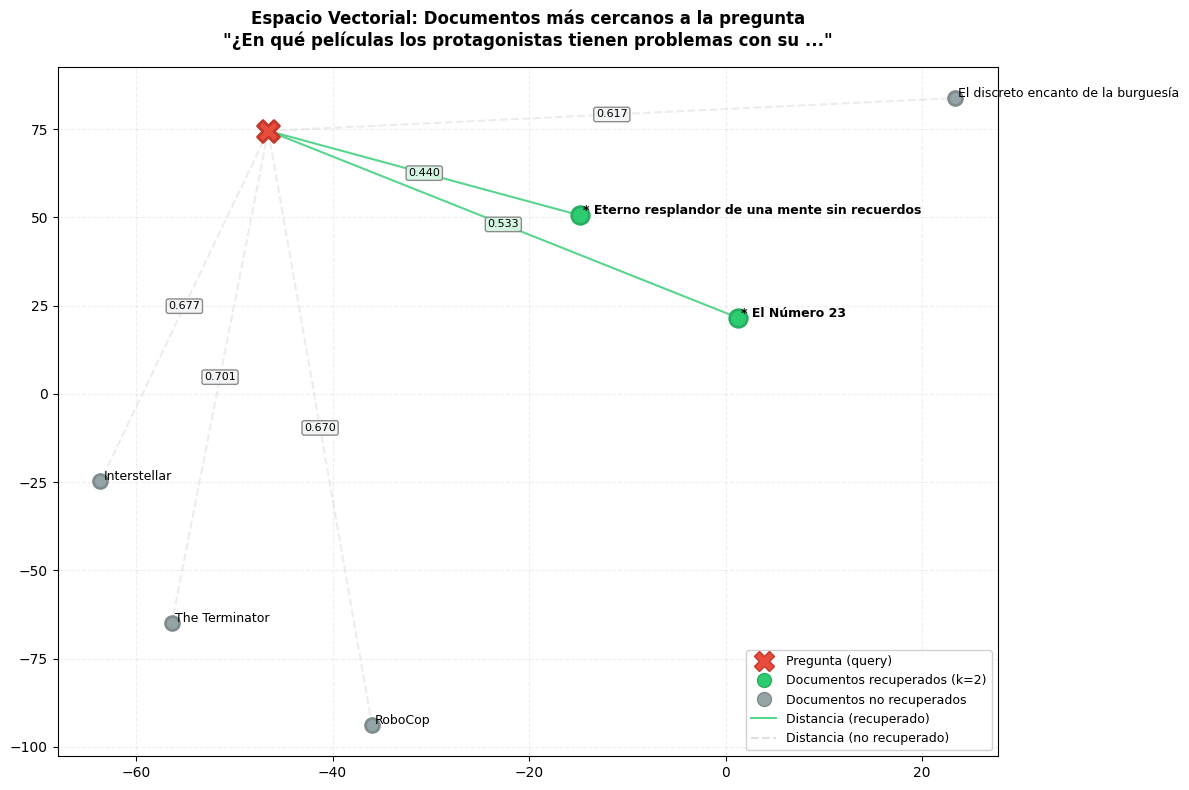


Distancias coseno (menor = más similar):
  0.4396  |  Eterno resplandor de una mente sin recuerdos  <- recuperado
  0.5329  |  El Número 23                                  <- recuperado
  0.6173  |  El discreto encanto de la burguesía           
  0.6701  |  RoboCop                                       
  0.6769  |  Interstellar                                  
  0.7011  |  The Terminator                                


In [12]:
from sklearn.metrics.pairwise import cosine_distances

all_docs = vector_db.get()
doc_embeddings = embeddings.embed_documents(all_docs['documents'])
query_embedding = embeddings.embed_query(query)

# Calcular distancias coseno entre la query y cada documento
doc_embeddings_array = np.array(doc_embeddings)
query_embedding_array = np.array(query_embedding).reshape(1, -1)
cosine_dists = cosine_distances(query_embedding_array, doc_embeddings_array)[0]

# Identificar los títulos de los documentos recuperados (k=2)
retrieved_titles = {doc.metadata['title'] for doc in retrieved_docs}
titles = [m['title'] for m in all_docs['metadatas']]

# Reducción dimensional con t-SNE
combined_matrix = np.array(doc_embeddings + [query_embedding])
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
reduced_vecs = tsne.fit_transform(combined_matrix)

doc_coords = reduced_vecs[:-1]
query_coord = reduced_vecs[-1]

# Graficar
fig, ax = plt.subplots(figsize=(12, 8))

for i, title in enumerate(titles):
    is_retrieved = title in retrieved_titles
    color = '#2ecc71' if is_retrieved else '#95a5a6'
    marker_size = 160 if is_retrieved else 100
    edge_color = '#27ae60' if is_retrieved else '#7f8c8d'
    zorder = 5 if is_retrieved else 3

    ax.scatter(doc_coords[i, 0], doc_coords[i, 1],
               c=color, s=marker_size, edgecolors=edge_color, linewidths=2, zorder=zorder)

    # Línea de distancia desde la query al documento
    line_style = '-' if is_retrieved else '--'
    line_alpha = 0.8 if is_retrieved else 0.3
    line_color = '#2ecc71' if is_retrieved else '#bdc3c7'
    ax.plot([query_coord[0], doc_coords[i, 0]],
            [query_coord[1], doc_coords[i, 1]],
            line_style, color=line_color, alpha=line_alpha, linewidth=1.5, zorder=1)

    # Texto de distancia coseno en el punto medio de la línea
    mid_x = (query_coord[0] + doc_coords[i, 0]) / 2
    mid_y = (query_coord[1] + doc_coords[i, 1]) / 2
    dist_text = f"{cosine_dists[i]:.3f}"
    bbox_color = '#d5f5e3' if is_retrieved else '#f2f3f4'
    ax.text(mid_x, mid_y, dist_text, fontsize=8, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.2', facecolor=bbox_color, edgecolor='gray', alpha=0.9),
            zorder=6)

    # Etiqueta del título
    label = f"* {title}" if is_retrieved else title
    font_weight = 'bold' if is_retrieved else 'normal'
    ax.text(doc_coords[i, 0] + 0.3, doc_coords[i, 1] + 0.3, label,
            fontsize=9, fontweight=font_weight, zorder=7)

# Query point
ax.scatter(query_coord[0], query_coord[1], c='#e74c3c', s=250, marker='X',
           edgecolors='#c0392b', linewidths=2, zorder=10, label='Tu Pregunta')

ax.set_title(f"Espacio Vectorial: Documentos más cercanos a la pregunta\n\"{query[:60]}...\"",
             fontsize=12, fontweight='bold', pad=15)

# Leyenda personalizada
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='X', color='w', markerfacecolor='#e74c3c',
           markersize=14, markeredgecolor='#c0392b', label='Pregunta (query)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#2ecc71',
           markersize=10, markeredgecolor='#27ae60', label='Documentos recuperados (k=2)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#95a5a6',
           markersize=10, markeredgecolor='#7f8c8d', label='Documentos no recuperados'),
    Line2D([0], [0], linestyle='-', color='#2ecc71', alpha=0.8, label='Distancia (recuperado)'),
    Line2D([0], [0], linestyle='--', color='#bdc3c7', alpha=0.5, label='Distancia (no recuperado)'),
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

# Tabla resumen de distancias
print("\nDistancias coseno (menor = más similar):")
print("=" * 55)
sorted_indices = np.argsort(cosine_dists)
for idx in sorted_indices:
    retrieved_mark = "<- recuperado" if titles[idx] in retrieved_titles else ""
    print(f"  {cosine_dists[idx]:.4f}  |  {titles[idx]:45s} {retrieved_mark}")